In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data_daily.csv')

In [4]:
df.head()

,Date,Receipt_Count
0,1/1/21,7564766
1,1/2/21,7455524
2,1/3/21,7095414
3,1/4/21,7666163
4,1/5/21,7771289


In [5]:
df.shape

(365, 2)

#EDA
check missing values 
check duplicates
check data type
check the number of unique values of each column
check statistics of data set
check various categories present in the different categorical column

In [6]:
df.isna().sum()

Date             0
Receipt_Count    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [9]:
df.nunique()

Date             365
Receipt_Count    365
dtype: int64

In [10]:
df.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [11]:
print(df.columns) 

Index(['Date', 'Receipt_Count'], dtype='object')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [14]:
df_monthly = df.groupby(['Year', 'Month'])['Receipt_Count'].sum().reset_index()


In [15]:
df.head()

,Date,Receipt_Count,Month,Day,Year,DayOfWeek
0,2021-01-01,7564766,1,1,2021,4
1,2021-01-02,7455524,1,2,2021,5
2,2021-01-03,7095414,1,3,2021,6
3,2021-01-04,7666163,1,4,2021,0
4,2021-01-05,7771289,1,5,2021,1


In [26]:
df.dtypes

Date             datetime64[ns]
Receipt_Count             int64
Month                     int64
Day                       int64
Year                      int64
DayOfWeek                 int64
dtype: object

In [16]:
print(df_monthly.head())

   Year  Month  Receipt_Count
0  2021      1      236736687
1  2021      2      220033460
2  2021      3      248608625
3  2021      4      250644830
4  2021      5      263151748


In [17]:
df_monthly['PrevMonthCount'] = df_monthly['Receipt_Count'].shift(1)
df_monthly['PrevMonthCount'].fillna(0, inplace=True)

In [18]:
print(df_monthly.head())

   Year  Month  Receipt_Count  PrevMonthCount
0  2021      1      236736687             0.0
1  2021      2      220033460     236736687.0
2  2021      3      248608625     220033460.0
3  2021      4      250644830     248608625.0
4  2021      5      263151748     250644830.0


In [27]:
print(df_monthly.tail())

    Year  Month  Receipt_Count  PrevMonthCount
7   2021      8      283943231     274776003.0
8   2021      9      281146154     283943231.0
9   2021     10      295965185     281146154.0
10  2021     11      296085162     295965185.0
11  2021     12      309948684     296085162.0


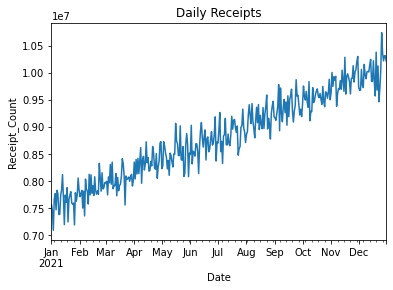

In [20]:
# Time series plot
df.set_index('Date').Receipt_Count.plot()
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.title('Daily Receipts')
plt.show()

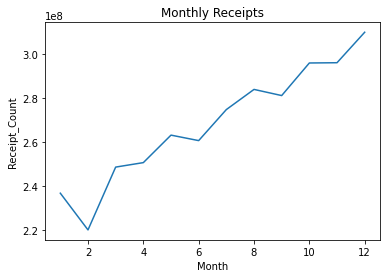

In [22]:
# Time series plot
df_monthly.set_index('Month').Receipt_Count.plot()
plt.xlabel('Month')
plt.ylabel('Receipt_Count')
plt.title('Monthly Receipts')
plt.show()

In [28]:
# Split data
X = df_monthly.drop('Receipt_Count', axis=1)
y = df_monthly['Receipt_Count']
# Split data into train and test
test_split = 0.2
split_idx = int(len(X) * (1 - test_split))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [ ]:
# Linear regression model 
class LinearRegression:

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent 
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) 
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train 
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2) 
print(f'MSE: {mse}')

In [ ]:
# Generate predictions for 2022
X_2022 = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]])

# Reshape X_2022 to match the model's weights shape
X_2022_reshaped = X_2022  # No need to reshape it to (12, 1)

y_pred_2022 = model.predict(X_2022_reshaped)
print('2022 Predictions:', y_pred_2022)



In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define the predicted values for each month (replace with your actual predictions)
predicted_values = y_pred_2022

# Create a bar plot for the predicted values
plt.figure(figsize=(12, 6))
plt.bar(months, predicted_values)
plt.xlabel('Month')
plt.ylabel('Predicted Receipt_Count')
plt.title('Predicted Receipt_Count for Each Month in 2022')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Load data 
train = df_monthly[:-12, 1]
test = df_monthly[-12:, 1]

# Plot data
plt.plot(train)
plt.title('Monthly Receipts')
plt.show()

# Differencing to make data stationary
train_diff = np.diff(train)
test_diff = np.diff(test)

# Plot ACF and PACF to determine AR/MA terms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_diff)
plot_pacf(train_diff)

# ARIMA model 
class ARIMA:

    def __init__(self, p, d, q):
        self.p = p # AR terms
        self.d = d # Integration order
        self.q = q # MA terms

    def fit(self, X):

        # Estimate AR coefficients
        ar_coeffs = []
        for i in range(self.p):
            coeff = np.corrcoef(X[:-i-1], X[i:])[0,1]
            ar_coeffs.append(coeff)
        
        # Estimate MA coefficients
        ma_coeffs = []
        resid = X.copy()
        for i in range(self.q):
            coeff = np.corrcoef(resid[:-i-1], resid[i:])[0,1]
            ma_coeffs.append(coeff)
            resid[i:] -= coeff * resid[:-i-1]

        self.ar_coeffs = ar_coeffs
        self.ma_coeffs = ma_coeffs

    def predict(self, X):

        forecasts = [X[0]]
        for i in range(len(X)):
            y_hat = 0
            
            for j in range(self.p):
                if i - j - 1 >= 0:
                    y_hat += self.ar_coeffs[j] * X[i-j-1]

            for k in range(self.q):
                if i - k - 1 >= 0: 
                    y_hat += self.ma_coeffs[k] * forecasts[i-k-1]

            forecasts.append(y_hat)

        return forecasts
            
# Fit ARIMA        
model = ARIMA(p=2, d=1, q=1)
model.fit(train_diff)

# Generate forecasts
predictions = model.predict(test_diff)
predictions = np.cumsum(predictions) # Reverse differencing

# Plot forecasts
plt.plot(train, label='Train')
plt.plot(np.arange(len(train), len(train)+len(predictions)), predictions, label='Forecasts')
plt.title('ARIMA Forecasts')
plt.legend()
plt.show()

print(predictions) # 2022 Forecasts

TypeError: '(slice(None, -12, None), 1)' is an invalid key

In [48]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('data_daily.csv')

# Convert date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate daily to monthly
df = df.set_index('Date').resample('M').sum().reset_index()

# Create time series oriented features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year 
df['PrevReceipts'] = df['Receipt_Count'].shift(1).fillna(0)


# Split data
X = df_monthly.drop('Receipt_Count', axis=1)
y = df_monthly['Receipt_Count']

# Train/test split
X_train = X_train.loc[:, (X_train != X_train.iloc[0]).any()]
# Split data into train and test
test_split = 0.2
split_idx = int(len(X) * (1 - test_split))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.tsatools import add_trend

X_train = add_trend(X_train, trend='c', has_constant='raise')

model = ARIMA(y_train, exog=X_train, order=(1,0,0))  
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(y_test), exog=X_test)
print(predictions)

ValueError: x contains one or more constant columns. Column(s) Year, Month, PrevMonthCount are constant. Adding a constant with trend='c' is not allowed.

In [50]:
pyplot.show()

NameError: name 'pyplot' is not defined